In [1]:
import weka.core.jvm as jvm
#initial process
jvm.start(system_cp=True, packages=True,max_heap_size="16384m")

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Adding system classpath
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\Admin\\anaconda3\\envs\\SelectAttributes\\Lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\Admin\\anaconda3\\envs\\SelectAttributes\\Lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\Admin\\anaconda3\\envs\\SelectAttributes\\Lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\Admin\\anaconda3\\envs\\SelectAttributes\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\Admin\\anaconda3\\envs\\SelectAttributes\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=16384m
DEBUG:weka.core.jvm:Package support enabled


In [2]:
import time
data_dir = "datatest//"
dataName ='heart_Cleveland_Kaggle.arff'
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file(data_dir + dataName)
data.class_is_last()

# Procesar datos
Generar atributos de seleccion del dataset, attributeSelection = ["GainRatioAttributeEval","InfoGainAttributeEval","OneRAttributeEval","ReliefFAttributeEval","SymmetricalUncertAttributeEval"]

In [3]:
#attributeSelection = ["GainRatioAttributeEval","InfoGainAttributeEval","OneRAttributeEval","ReliefFAttributeEval","SymmetricalUncertAttributeEval"]

attributeSelection = ["GainRatioAttributeEval","InfoGainAttributeEval","OneRAttributeEval","ClassifierAttributeEval"]

from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
informationSelect={}
for attribute in attributeSelection:
    print("Analizated information with ",attribute)
    search = ASSearch(classname="weka.attributeSelection.Ranker")
    evaluator = ASEvaluation(classname=f"weka.attributeSelection.{attribute}")
    attsel = AttributeSelection()
    attsel.search(search)
    attsel.evaluator(evaluator)
    attsel.select_attributes(data)
    for letter in attsel.results_string.split("\n"):
        if letter.startswith("Selected"):
            informationSelect[attribute] = letter

copyinformation = informationSelect.copy()
#print("# attributes: " + str(attsel.number_attributes_selected))
#print("attributes: " + str(attsel.selected_attributes))
    #print("result string:\n" + attsel.results_string)

Analizated information with  GainRatioAttributeEval
Analizated information with  InfoGainAttributeEval
Analizated information with  OneRAttributeEval
Analizated information with  ClassifierAttributeEval


### Procesar datos 1.1

Informacion obtenidos por cada Seccion

In [5]:
import json
print(json.dumps(informationSelect, sort_keys=False, indent=2))
print(data.attribute_names())

{
  "GainRatioAttributeEval": "Selected attributes: 13,9,8,3,12,10,11,2,1,7,6,5,4 : 13",
  "InfoGainAttributeEval": "Selected attributes: 13,3,12,10,9,8,11,1,2,7,6,4,5 : 13",
  "OneRAttributeEval": "Selected attributes: 13,3,12,9,11,10,8,1,2,7,4,5,6 : 13",
  "ClassifierAttributeEval": "Selected attributes: 13,6,4,3,2,5,7,12,8,11,10,9,1 : 13"
}
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Organizar y limpiar filtros de datos generados

In [219]:
lastNumberSeccion = 0
for key, values in informationSelect.items():
    new_value=[]
    for value in values.split(":")[1].split(","):
        new_value.append(int(value))
        if lastNumberSeccion <  int(value):
            lastNumberSeccion = int(value)
    informationSelect[key] = new_value
print(json.dumps(informationSelect, sort_keys=False, indent=2))

{
  "GainRatioAttributeEval": [
    12,
    26,
    4,
    25,
    39,
    6,
    30,
    38,
    5,
    29,
    3,
    37,
    34,
    33,
    8,
    35,
    23,
    31,
    41,
    32,
    28,
    27,
    36,
    16,
    15,
    2,
    10,
    13,
    19,
    1,
    40,
    18,
    17,
    24,
    14,
    22,
    7,
    11,
    20,
    9,
    21
  ],
  "InfoGainAttributeEval": [
    5,
    3,
    6,
    4,
    30,
    29,
    33,
    34,
    35,
    38,
    12,
    39,
    25,
    23,
    26,
    37,
    32,
    36,
    31,
    24,
    41,
    2,
    27,
    40,
    28,
    1,
    10,
    8,
    13,
    16,
    19,
    22,
    17,
    15,
    14,
    18,
    7,
    11,
    9,
    20,
    21
  ],
  "OneRAttributeEval": [
    5,
    3,
    6,
    4,
    29,
    30,
    34,
    33,
    35,
    12,
    23,
    25,
    38,
    39,
    26,
    32,
    36,
    37,
    24,
    31,
    41,
    40,
    27,
    28,
    2,
    8,
    10,
    13,
    1,
    14,
    20,
    22,
    18,
    19,
   

In [222]:
informationSelect[attributeSelection[0]]

[12,
 26,
 4,
 25,
 39,
 6,
 30,
 38,
 5,
 29,
 3,
 37,
 34,
 33,
 8,
 35,
 23,
 31,
 41,
 32,
 28,
 27,
 36,
 16,
 15,
 2,
 10,
 13,
 19,
 1,
 40,
 18,
 17,
 24,
 14,
 22,
 7,
 11,
 20,
 9,
 21]

### Procesar datos 1.2

Analizar datos generados por seccion y generar algoritmo de mejor rendimiento para obtener el mejor resultado de cada uno

In [124]:
import pandas as pd
df_evaluation =pd.DataFrame(informationSelect)
df_evaluation.head(20)

,GainRatioAttributeEval,InfoGainAttributeEval,OneRAttributeEval
0,12,5,5
1,26,3,3
2,4,6,6
3,25,4,4
4,39,30,29
5,6,29,30
6,30,33,34
7,38,34,33
8,5,35,35
9,29,38,12


Generar y hacer competicion de rendimiento de mejores parametros de seleccion

In [125]:
totalPorcentData = round((len(informationSelect["GainRatioAttributeEval"])-1)/3)
competition ={}
for i in range(df_evaluation.shape[0]):
    evaluations= df_evaluation.loc[i]
    elimination = {}
    
    for evaluation in evaluations :
        avarage = 0
        cant = 0
        for attribute in attributeSelection:
            avarage+=df_evaluation.loc[df_evaluation.loc[:, attribute] == evaluation].index[0]
            cant += 1
        elimination[evaluation]=avarage/cant
    
    minNumber = None
    minKey = None
    for key ,value in elimination.items():
        if minNumber != None:
            if minNumber > value:
                minNumber = value
                minKey =key
            continue
        minNumber = value
        minKey =key
    
    competition[minKey] = minNumber
    if len(competition) >= totalPorcentData:
        break
    

Mejores resultados comparando con las mejores selecciones de atributos y limpiado de datos como estructurado de datos para dataset python 

In [126]:
import operator
finalSorted = sorted(competition.items(),key=operator.itemgetter(1))
finalSorted

[(5, 2.6666666666666665),
 (4, 2.6666666666666665),
 (6, 3.0),
 (3, 4.0),
 (30, 5.0),
 (29, 6.0),
 (34, 8.333333333333334),
 (25, 8.666666666666666),
 (33, 8.666666666666666),
 (26, 9.666666666666666),
 (35, 10.333333333333334),
 (23, 13.0),
 (37, 14.333333333333334)]

In [127]:
new_pas=[]
for value in finalSorted:
    new_pas.append(value[0]-1)
informationSelect["AvgSelectionBest"] = new_pas

cant = len(informationSelect["AvgSelectionBest"])
for key,values in informationSelect.items():
    if key != "AvgSelectionBest":
        new_parmer = []
        for value in values[:cant]:
            new_parmer.append(value-1)
        informationSelect[key]=new_parmer
        continue
    informationSelect[key]=values[:cant]
    
informationSelect

{'GainRatioAttributeEval': [11, 25, 3, 24, 38, 5, 29, 37, 4, 28, 2, 36, 33],
 'InfoGainAttributeEval': [4, 2, 5, 3, 29, 28, 32, 33, 34, 37, 11, 38, 24],
 'OneRAttributeEval': [4, 2, 5, 3, 28, 29, 33, 32, 34, 11, 22, 24, 37],
 'AvgSelectionBest': [4, 3, 5, 2, 29, 28, 33, 24, 32, 25, 34, 22, 36]}

In [128]:
df_evaluation =pd.DataFrame(informationSelect)
df_evaluation.head(cant)

,GainRatioAttributeEval,InfoGainAttributeEval,OneRAttributeEval,AvgSelectionBest
0,11,4,4,4
1,25,2,2,3
2,3,5,5,5
3,24,3,3,2
4,38,29,28,29
5,5,28,29,28
6,29,32,33,33
7,37,33,32,24
8,4,34,34,32
9,28,37,11,25


# Generador de datos con los atributos de seleccion

In [131]:
# Dataset Normal

import pandas as pd
df = pd.read_csv("datatest/trainred.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### Limpieza de datos 

In [132]:
# Mirar que valores nulos exiten 
missing_values_count = df.isnull().sum()

missing_values_count[0:10]

duration          0
protocol_type     0
service           0
flag              0
src_bytes         0
dst_bytes         0
land              0
wrong_fragment    0
urgent            0
hot               0
dtype: int64

In [133]:
import numpy as np
# how many total missing values do we have?
nfl_data = df.copy()
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("porcentaje de datos que faltan ",percent_missing," %")

porcentaje de datos que faltan  0.0  %


### Generador de datos con atributos de seleccion  GainRatioAttributeEval , InfoGainAttributeEval , OneRAttributeEval , ReliefFAttributeEval , SymmetricalUncertAttributeEval ,AvgSelectionBest 
# sin normalizar 

In [134]:

from numpy import where

parametres = df.columns
dataSelect={}

for key , values in informationSelect.items():
    new_parametres= []
    for value in values:
        new_parametres.append(parametres[value])
    new_parametres.append(parametres[-1:][0])
    dataSelect[key] = df[new_parametres]


In [206]:
dataSelect["GainRatioAttributeEval"]

,logged_in,srv_serror_rate,flag,serror_rate,dst_host_srv_serror_rate,dst_bytes,diff_srv_rate,dst_host_serror_rate,src_bytes,same_srv_rate,service,dst_host_srv_diff_host_rate,dst_host_same_srv_rate,class
0,0,0.0,SF,0.0,0.00,0,0.00,0.00,491,1.00,ftp_data,0.00,0.17,normal
1,0,0.0,SF,0.0,0.00,0,0.15,0.00,146,0.08,other,0.00,0.00,normal
2,0,1.0,S0,1.0,1.00,0,0.07,1.00,0,0.05,private,0.00,0.10,anomaly
3,1,0.2,SF,0.2,0.01,8153,0.00,0.03,232,1.00,http,0.04,1.00,normal
4,1,0.0,SF,0.0,0.00,420,0.00,0.00,199,1.00,http,0.00,1.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0.0,RSTO,0.0,0.00,0,0.07,0.00,0,0.07,exec,0.00,0.03,anomaly
25188,1,0.0,SF,0.0,0.00,0,0.00,0.00,334,1.00,ftp_data,0.18,1.00,anomaly
25189,0,0.0,REJ,0.0,0.00,0,0.07,0.00,0,0.07,private,0.00,0.05,anomaly
25190,0,1.0,S0,1.0,1.00,0,0.06,1.00,0,0.14,nnsp,0.00,0.08,anomaly


In [137]:
df_evaluation

,GainRatioAttributeEval,InfoGainAttributeEval,OneRAttributeEval,AvgSelectionBest
0,11,4,4,4
1,25,2,2,3
2,3,5,5,5
3,24,3,3,2
4,38,29,28,29
5,5,28,29,28
6,29,32,33,33
7,37,33,32,24
8,4,34,34,32
9,28,37,11,25


In [223]:
for key,values in df_evaluation.items():
    print(key)
    rules = ""
    for i in range(lastNumberSeccion):
        if not i in list(values):
            rules = rules + (str(i+1))+","
        
    print(rules[:-1])
    
    remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", rules[:-1]])
    remove.inputformat(data)
    filtered = remove.filter(data)
    print(filtered.attribute_names())
    break

GainRatioAttributeEval
1,2,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,27,28,31,32,33,35,36,40,41
['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'class']


In [53]:
for key ,df in dataSelect.items():
    print(f"Guardando datos {key}")
    df.to_csv(f'datatest/SIN{key}.csv',index=False)
    

Guardando datos GainRatioAttributeEval
Guardando datos InfoGainAttributeEval
Guardando datos OneRAttributeEval
Guardando datos AvgSelectionBest


Convertir csv a arff

In [18]:
import os
import weka.core.converters as converters
contenido = os.listdir(os.path.abspath(os.getcwd())+'/datatest')
for nameFile in contenido:
    if nameFile.startswith("SIN")  :
        nameFile = nameFile.split(".")[0]
        print("Guardando ",nameFile,".arff'")
        data_dir=f"datatest/{nameFile}.csv"
        dataCsv = converters.load_any_file(data_dir)
        dataCsv.class_is_last()
        f = open (f'datatest/{nameFile}.arff','w')
        f.write(str(dataCsv))
        f.close()

Guardando  SINAvgSelectionBest .arff'
Guardando  SINGainRatioAttributeEval .arff'
Guardando  SINInfoGainAttributeEval .arff'
Guardando  SINOneRAttributeEval .arff'


### Generador de datos con atributos de seleccion GainRatioAttributeEval , InfoGainAttributeEval , OneRAttributeEval , ReliefFAttributeEval , SymmetricalUncertAttributeEval ,AvgSelectionBest 
# CON NORMALIZACION 

# Entrenamiento bayesNet,Naivebayes,NaivebayesUpdateable  con cada metodo de seleccion y sin metodo seleccion

In [562]:
bayesNames = ["BayesNet","NaiveBayes"]
from weka.classifiers import Classifier
import time
from weka.core.converters import Loader
from weka.filters import Filter
import pandas as pd 
from numpy import where
import numpy as np

In [563]:
from weka.classifiers import FilteredClassifier
from weka.classifiers import Evaluation
from weka.core.classes import Random
import os
from decimal import Decimal
import operator
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
from weka.core.converters import Loader
import os
import weka.core.converters as converters
import operator
from os import remove
import pandas as pd
from weka.core.converters import Loader
import time
import weka.plot.classifiers as plcls  # NB: matplotlib is required

def get_data(fichero,data_dir , dataName):
    print(f"====Selection name: {fichero.split('SIN')[1].split('.arff')[0]}====")
    data_dir = "datatest//"
    dataName = fichero
    loader = Loader(classname="weka.core.converters.ArffLoader")
    data = loader.load_file(data_dir + dataName)
    data.class_is_last()
    return data

def get_remove(bayes):
    remove = Filter(classname="weka.filters.unsupervised.attribute.Remove")
    cls = Classifier(classname=f"weka.classifiers.bayes.{bayes}")
    fc = FilteredClassifier()
    fc.classifier = cls
    return fc,cls
 
def get_values(data,fc,folds):
    evl = Evaluation(data)
    evl.crossvalidate_model(fc, data, folds, Random(1))

    precision = evl.percent_correct
    precisionAvg = 0
    if evl.class_details().split("\n")[5].split()[4] != "?":
        precisionAvg =evl.class_details().split("\n")[5].split()[4]
            
            
    vp = int(evl.matrix().split("\n")[3].split("|")[0].split()[0])
    fn = int(evl.matrix().split("\n")[3].split("|")[0].split()[1])
    fp = int(evl.matrix().split("\n")[4].split("|")[0].split()[0])
    vn = int(evl.matrix().split("\n")[4].split("|")[0].split()[1])
            
    accuracy = (vp+vn)/(vp+fn+fp+vn)
    sensibility = (vp)/(vp+fn)
    specificity = vn/(vn+fp)
    cant = len(data.attribute_names())-1
    
    #plcls.plot_roc(evl, class_index=[0, 1], wait=True)
    
    return vp,fn,fp,vn,accuracy,sensibility,specificity,cant,precision,precisionAvg

def get_values_test(cls,data):
    evl = Evaluation(data)
    evl.test_model(cls, data)
    
    precision = evl.percent_correct
    precisionAvg = 0
    if evl.class_details().split("\n")[5].split()[4] != "?":
        precisionAvg =evl.class_details().split("\n")[5].split()[4]
            
            
    vp = int(evl.matrix().split("\n")[3].split("|")[0].split()[0])
    fn = int(evl.matrix().split("\n")[3].split("|")[0].split()[1])
    fp = int(evl.matrix().split("\n")[4].split("|")[0].split()[0])
    vn = int(evl.matrix().split("\n")[4].split("|")[0].split()[1])
            
    accuracy = (vp+vn)/(vp+fn+fp+vn)
    sensibility = (vp)/(vp+fn)
    specificity = vn/(vn+fp)
    cant = len(data.attribute_names())-1
    
    #plcls.plot_roc(evl, class_index=[0, 1], wait=True)
    
    return vp,fn,fp,vn,accuracy,sensibility,specificity,cant,precision,precisionAvg
    
def save_information(informationSelect,parametres,dataSelect):
    for key , values in informationSelect.items():
        new_parametres= []
        for value in values:
            new_parametres.append(parametres[value])
        new_parametres.append(parametres[-1:][0])
        dataSelect[key] = df[new_parametres]

    for key ,df in dataSelect.items():
        df.to_csv(f'datatest/SIN{key}.csv',index=False)

        

In [574]:
contenido = os.listdir(os.path.abspath(os.getcwd())+'/datatest')
folds =10
count =0
dictBayes={}
dictTest={}

competition ={}
attributeSelection = ["GainRatioAttributeEval","InfoGainAttributeEval","OneRAttributeEval","ReliefFAttributeEval","SymmetricalUncertAttributeEval","ClassifierAttributeEval","CorrelationAttributeEval"]
#attributeSelection = ["GainRatioAttributeEval","InfoGainAttributeEval","OneRAttributeEval"]

df_count = pd.read_csv("datatest/trainred.csv")
# Dataset Normal weka

data_dir = "datatest//"
dataName ='heart_Cleveland_Kaggle.arff'

loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file(data_dir + dataName)
data.class_is_last()


#Generar todos los atributos de seleccion sin limpiarlos
from weka.attribute_selection import ASSearch, ASEvaluation, AttributeSelection
informationSelect={}
for attribute in attributeSelection:
    print("Analizated information with ",attribute)
    search = ASSearch(classname="weka.attributeSelection.Ranker")
    evaluator = ASEvaluation(classname=f"weka.attributeSelection.{attribute}")
    attsel = AttributeSelection()
    attsel.search(search)
    attsel.evaluator(evaluator)
    attsel.select_attributes(data)
    for letter in attsel.results_string.split("\n"):
        if letter.startswith("Selected"):
            informationSelect[attribute] = letter



#limpiar los datos
lastNumberSeccion = 0
for key, values in informationSelect.items():
    new_value=[]
    for value in values.split(":")[1].split(","):
        new_value.append(int(value))
        if lastNumberSeccion <  int(value):
            lastNumberSeccion = int(value)
    informationSelect[key] = new_value

numberRepeat = len(informationSelect[attributeSelection[0]])+1
print(numberRepeat)
for cantSelect in range(5,numberRepeat) :
    copyinformation = informationSelect.copy()
    df_evaluation =pd.DataFrame(copyinformation)
    print(f"    -----======  Numero de caracteristicas {cantSelect} ======------ ")
    totalPorcentData = int(cantSelect)
    competition ={}
    for i in range(df_evaluation.shape[0]):
        evaluations= df_evaluation.loc[i]
        elimination = {}

        for evaluation in evaluations :
            avarage = 0
            cant = 0
            for attribute in attributeSelection:
                avarage+=df_evaluation.loc[df_evaluation.loc[:, attribute] == evaluation].index[0]
                cant += 1
            elimination[evaluation]=avarage/cant

        minNumber = None
        minKey = None
        for key ,value in elimination.items():
            if minNumber != None:
                if minNumber > value:
                    minNumber = value
                    minKey =key
                continue
            minNumber = value
            minKey =key

        competition[minKey] = minNumber
        if len(competition) >= totalPorcentData:
            break
            
    
    finalSorted = sorted(competition.items(),key=operator.itemgetter(1))
    new_pas=[]
    for value in finalSorted:
        new_pas.append(value[0]-1)
    copyinformation["AvgSelectionBest"] = new_pas

    cant = len(copyinformation["AvgSelectionBest"])
    for key,values in copyinformation.items():
        if key != "AvgSelectionBest":
            new_parmer = []
            for value in values[:cant]:
                new_parmer.append(value-1)
            copyinformation[key]=new_parmer
            continue
        copyinformation[key]=values[:cant]
    df_evaluation =pd.DataFrame(copyinformation)
 

        
    for key,values in df_evaluation.items():
        print(f"      =========  Evaluation {key} =========    ")
        rules = ""
        for i in range(lastNumberSeccion):
            if not i in list(values):
                rules = rules + (str(i+1))+","

        remove = Filter(classname="weka.filters.unsupervised.attribute.Remove", options=["-R", rules[:-1]])
        remove.inputformat(data)
        filtered = remove.filter(data)
        filtered.class_is_last()
        
        print("Crossvalidation")
        for bayes in bayesNames:
                if not bayes in dictBayes:
                    dictBayes[bayes] = []
                print(f"Bayes name: {bayes} ")

                fc,_ = get_remove(bayes)

                vp,fn,fp,vn,accuracy,sensibility,specificity,cant,precision,precisionAvg=get_values(filtered,fc,folds)

                dictBayes[bayes].append({"carac":cantSelect,
                                         "vp":vp,
                                         "vn":vn,
                                         "fp":fp,
                                         "fn":fn,
                                         "precision":precisionAvg,
                                         "accuracy":accuracy,
                                         "sensibility":sensibility,
                                         "specificity":specificity,
                                         "NameSelection":key,
                                        "NameBayes":bayes})
        print("Test")
        for bayes in bayesNames:
                if not bayes in dictTest:
                    dictTest[bayes] = []
                print(f"Bayes name: {bayes} ")

                _,cls = get_remove(bayes)
                cls.build_classifier(filtered)
                vp,fn,fp,vn,accuracy,sensibility,specificity,cant,precision,precisionAvg=get_values_test(cls,filtered)

                dictTest[bayes].append({"carac":cantSelect,
                                         "vp":vp,
                                         "vn":vn,
                                         "fp":fp,
                                         "fn":fn,
                                         "precision":precisionAvg,
                                         "accuracy":accuracy,
                                         "sensibility":sensibility,
                                         "specificity":specificity,
                                         "NameSelection":key,
                                        "NameBayes":bayes})

Analizated information with  GainRatioAttributeEval
Analizated information with  InfoGainAttributeEval
Analizated information with  OneRAttributeEval
Analizated information with  ReliefFAttributeEval
Analizated information with  SymmetricalUncertAttributeEval
Analizated information with  ClassifierAttributeEval
Analizated information with  CorrelationAttributeEval
14
    -----======  Numero de caracteristicas 5 ======------ 
      =========  Evaluation GainRatioAttributeEval =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
      =========  Evaluation InfoGainAttributeEval =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
      =========  Evaluation OneRAttributeEval =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
      =========  Evaluation ReliefFAttribut

Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
      =========  Evaluation ClassifierAttributeEval =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
      =========  Evaluation CorrelationAttributeEval =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
      =========  Evaluation AvgSelectionBest =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
    -----======  Numero de caracteristicas 11 ======------ 
      =========  Evaluation GainRatioAttributeEval =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bayes name: NaiveBayes 
      =========  Evaluation InfoGainAttributeEval =========    
Crossvalidation
Bayes name: BayesNet 
Bayes name: NaiveBayes 
Test
Bayes name: BayesNet 
Bay

In [575]:
import pandas_profiling
from pandas import json_normalize
allList = []
for bayes,values in  dictBayes.items():
    for value in values:
        allList.append(value)
allListTest = []
for bayes,values in  dictTest.items():
    for value in values:
        allListTest.append(value)

In [576]:
df = json_normalize(allList)
dfTest = json_normalize(allListTest)
contenido = os.listdir(os.path.abspath(os.getcwd())+'/datatest')
simulacion = {}
for fichero in list(df["NameSelection"].unique()):
    simulacion[fichero]=df.groupby(df.NameSelection).get_group(fichero).sort_values('precision',ascending=False).sort_values('accuracy',ascending=False)
    simulacion[fichero] = simulacion[fichero].reset_index(drop=True)
    
simulacionTest = {}
for fichero in list(dfTest["NameSelection"].unique()):
    simulacionTest[fichero]=dfTest.groupby(df.NameSelection).get_group(fichero).sort_values('precision',ascending=False).sort_values('accuracy',ascending=False)
    simulacionTest[fichero] = simulacionTest[fichero].reset_index(drop=True)

simulacionTest["SymmetricalUncertAttributeEval"]

,carac,vp,vn,fp,fn,precision,accuracy,sensibility,specificity,NameSelection,NameBayes
0,7,111,148,17,27,0.855,0.854785,0.804348,0.896970,SymmetricalUncertAttributeEval,BayesNet
1,10,114,144,21,24,0.851,0.851485,0.826087,0.872727,SymmetricalUncertAttributeEval,BayesNet
2,5,108,150,15,30,0.854,0.851485,0.782609,0.909091,SymmetricalUncertAttributeEval,BayesNet
3,12,114,144,21,24,0.851,0.851485,0.826087,0.872727,SymmetricalUncertAttributeEval,BayesNet
4,11,114,144,21,24,0.851,0.851485,0.826087,0.872727,SymmetricalUncertAttributeEval,BayesNet
5,13,114,144,21,24,0.851,0.851485,0.826087,0.872727,SymmetricalUncertAttributeEval,BayesNet
6,9,114,144,21,24,0.851,0.851485,0.826087,0.872727,SymmetricalUncertAttributeEval,BayesNet
7,8,114,144,21,24,0.851,0.851485,0.826087,0.872727,SymmetricalUncertAttributeEval,BayesNet
8,7,112,146,19,26,0.852,0.851485,0.811594,0.884848,SymmetricalUncertAttributeEval,NaiveBayes
9,6,110,148,17,28,0.852,0.851485,0.797101,0.896970,SymmetricalUncertAttributeEval,NaiveBayes


In [577]:
listBest =[]
for key in simulacion.keys():
    listBest.append(pd.DataFrame(simulacion[key].loc[0]).T)
simulacion["MejoresResultados"] =pd.concat(listBest)

In [578]:
listBestTest =[]
for key in simulacionTest.keys():
    listBestTest.append(pd.DataFrame(simulacionTest[key].loc[0]).T)
simulacionTest["MejoresResultados"] =pd.concat(listBestTest)

In [579]:
for key, dfs in simulacion.items():
    dfs=dfs.sort_values('precision',ascending=False).sort_values('accuracy',ascending=False)
    dfs.to_csv(f'simulacion/{key}.csv',index=False)
    

In [580]:
for key, dfs in simulacionTest.items():
    dfs=dfs.sort_values('precision',ascending=False).sort_values('accuracy',ascending=False)
    dfs.to_csv(f'simulacionTest/{key}.csv',index=False)

data_dir = "datatedst//"
dataName ='heart_Cleveland_Kaggle.arff'

loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file(data_dir + dataName)
data.class_is_last()

cls = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
cls.build_classifier(data)
evl = Evaluation(data)
evl.test_model(cls, data)
print(evl.confusion_matrix)

for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))



In [451]:
pp = df_new.copy()
pp =pd.concat([pp,pd.get_dummies(pp['flag'],prefix='flag')],axis=1)
pp.drop(['flag'],axis=1,inplace=True)
pp =pd.concat([pp,pd.get_dummies(pp['service'],prefix='service')],axis=1)
pp.drop(['service'],axis=1,inplace=True)
p2 = pp.columns

In [435]:
pp.head()

,same_srv_rate,logged_in,diff_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,srv_serror_rate,count,dst_host_count,dst_host_srv_diff_host_rate,dst_host_same_src_port_rate,...,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,1.00,0,0.00,0.00,0.00,0.0,2,150,0.00,0.17,...,0,0,0,0,0,0,0,0,0,0
1,0.08,0,0.15,0.00,0.00,0.0,13,255,0.00,0.88,...,0,0,0,0,0,0,0,0,0,0
2,0.05,0,0.07,1.00,1.00,1.0,123,255,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,1.00,1,0.00,0.01,0.03,0.2,5,30,0.04,0.03,...,0,0,0,0,0,0,0,0,0,0
4,1.00,1,0.00,0.00,0.00,0.0,30,255,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["class"] = where(df["class"]=="normal",0,1) 
train_labels = df["class"]

In [267]:
import tensorflow as tf
# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import pandas as pd
from numpy import where

In [268]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((None,87,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [269]:
model.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [270]:
history = model.fit(pp,train_labels,validation_split=0.2,epochs=100)

Epoch 1/100
630/630 [==============================] - 2s 2ms/step - loss: 0.5555 - accuracy: 0.8433 - val_loss: 0.2078 - val_accuracy: 0.9250
Epoch 2/100
630/630 [==============================] - 1s 2ms/step - loss: 0.1885 - accuracy: 0.9397 - val_loss: 0.1192 - val_accuracy: 0.9714
Epoch 3/100
630/630 [==============================] - 1s 1ms/step - loss: 0.1540 - accuracy: 0.9540 - val_loss: 0.1376 - val_accuracy: 0.9643
Epoch 4/100
630/630 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9650 - val_loss: 0.1027 - val_accuracy: 0.9758
Epoch 5/100
630/630 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9673 - val_loss: 0.0931 - val_accuracy: 0.9758
Epoch 6/100
630/630 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9712 - val_loss: 0.0902 - val_accuracy: 0.9762
Epoch 7/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9730 - val_loss: 0.0935 - val_accuracy: 0.9752

Epoch 58/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 59/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0627 - val_accuracy: 0.9827
Epoch 60/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0723 - val_accuracy: 0.9808
Epoch 61/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0640 - val_accuracy: 0.9825
Epoch 62/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9814 - val_loss: 0.0648 - val_accuracy: 0.9813
Epoch 63/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9823 - val_loss: 0.0632 - val_accuracy: 0.9831
Epoch 64/100
630/630 [==============================] - 1s 2ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0602 - val_accuracy:

In [271]:
test_loss,test_acc = model.evaluate(pp,train_labels,verbose=2)

788/788 - 1s - loss: 0.0513 - accuracy: 0.9849 - 664ms/epoch - 843us/step


In [272]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

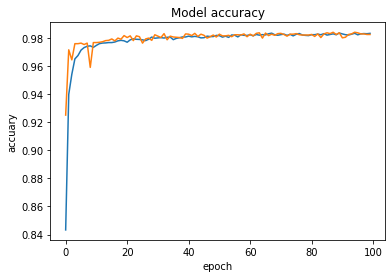

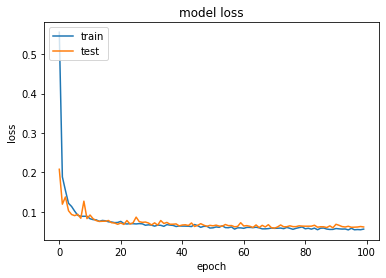

In [273]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("accuary")
plt.xlabel("epoch")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [442]:
import pandas as pd
df = pd.read_csv("datatest/testred.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,13.0,tcp,telnet,SF,118.0,2425.0,0.0,0.0,0.0,0.0,...,10.0,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,anomaly
1,0.0,udp,private,SF,44.0,0.0,0.0,0.0,0.0,0.0,...,254.0,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,anomaly
2,0.0,tcp,telnet,S3,0.0,44.0,0.0,0.0,0.0,0.0,...,79.0,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,anomaly
3,0.0,udp,private,SF,53.0,55.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0.0,tcp,private,SH,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,anomaly


In [443]:
from numpy import where

parametres = df.columns
new_parametres= []
for value in finalSorted:
    new_parametres.append(parametres[value[0]-1])
print(parametres[-1:])
df["class"] = where(df["class"]=="normal",0,1) 
test_labels = df["class"]

Index(['class'], dtype='object')


In [444]:
df_new = df[new_parametres]
df_new

,flag,service,same_srv_rate,logged_in,diff_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,srv_serror_rate,count,dst_host_count,dst_host_srv_diff_host_rate,dst_host_same_src_port_rate
0,SF,telnet,1.00,1.0,0.0,0.00,0.00,0.0,1.0,26.0,0.0,0.04
1,SF,private,0.75,0.0,0.5,0.00,0.00,0.0,4.0,255.0,0.0,0.01
2,S3,telnet,1.00,0.0,0.0,0.68,0.21,1.0,1.0,255.0,0.0,0.00
3,SF,private,1.00,0.0,0.0,0.00,0.00,0.0,511.0,255.0,0.0,0.87
4,SH,private,1.00,0.0,0.0,1.00,1.00,1.0,1.0,16.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
11850,SF,rje,1.00,0.0,0.0,0.00,0.00,0.0,4.0,255.0,0.0,0.00
11851,SF,imap4,1.00,0.0,0.0,0.00,0.00,0.0,4.0,255.0,0.0,0.00
11852,SF,IRC,1.00,0.0,0.0,0.00,0.00,0.0,4.0,255.0,0.0,0.00
11853,SF,whois,1.00,0.0,0.0,0.00,0.00,0.0,4.0,255.0,0.0,0.00


In [445]:
df_new =pd.concat([df_new,pd.get_dummies(df_new['flag'],prefix='flag')],axis=1)
df_new.drop(['flag'],axis=1,inplace=True)
df_new =pd.concat([df_new,pd.get_dummies(df_new['service'],prefix='service')],axis=1)
df_new.drop(['service'],axis=1,inplace=True)
df_new.head()
p1= df_new.columns

In [424]:
test_labels

0        1
1        1
2        1
3        0
4        1
        ..
11845    0
11846    0
11847    1
11848    1
11849    1
Name: class, Length: 11850, dtype: int32

In [425]:
prediction = model.predict(df_new)

ValueError: in user code:

    File "C:\Users\Admin\anaconda3\envs\SelectAttributes\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\envs\SelectAttributes\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\envs\SelectAttributes\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Admin\anaconda3\envs\SelectAttributes\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\Admin\anaconda3\envs\SelectAttributes\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Admin\anaconda3\envs\SelectAttributes\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" (type Sequential).
    
    Input 0 of layer "dense_96" is incompatible with the layer: expected axis -1 of input shape to have value 87, but received input with shape (None, 83)
    
    Call arguments received by layer "sequential_27" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 83), dtype=float64)
      • training=False
      • mask=None


In [ ]:
prediction

In [454]:
for i in p1:
    if not i in p2:
        print(i)

service_tftp_u


In [12]:
jvm.stop()